# DEEP LEARNING

Deep learning je područje ML-a koje koristi strukturu dubokih neourosnkih mreža za predikcije. Na temljeu podataka i zavisne varijable, algoritam pronalazi pravila za predikciju. Naglasak je na reprezentaciji podataka koja će omogučiti lakšu klasifikaciju.

"Deep stands for idea of successive layers of representations".

In [5]:
from IPython.display import display, Image
Image(url='https://raw.githubusercontent.com/MislavSag/trademl/master/images/dl_1.png')

In [6]:
Image(url='https://raw.githubusercontent.com/MislavSag/trademl/master/images/dl_2.png')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

### IMPORT DATA

In [203]:
### GLOBAL (CONFIGS)

DATA_PATH = 'C:/Users/Mislav/algoAItrader/data/'


### PANDAS OPTIONS

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


### IMPORT DATA
spy = pd.read_hdf(DATA_PATH + 'spy_with_vix.h5')  # , start=0, stop=1000000

### DAILY FREQUENCY (COMPUTATION ISSUES)

In [204]:
spy_daily = spy.resample('3H').last().dropna()

# delete to decrease RAM
del spy

# remove ohl
remove_ohl = ['open', 'low', 'high', 'vixFirst', 'vixHigh', 'vixLow']  # correlatin > 0.99
spy_daily.drop(columns=remove_ohl, inplace=True)  #correlated with close
display(spy_daily.head())
print(spy_daily.shape)

,close,volume,vixClose,vixVolume,DEMA5,DEMA30,DEMA60,DEMA300,DEMA480,DEMA2400,DEMA12000,DEMA96000,EMA5,EMA30,EMA60,EMA300,EMA480,EMA2400,EMA12000,EMA96000,MIDPRICE5,MIDPRICE30,MIDPRICE60,MIDPRICE300,MIDPRICE480,MIDPRICE2400,MIDPRICE12000,MIDPRICE96000,SMA5,SMA30,SMA60,SMA300,SMA480,SMA2400,SMA12000,SMA96000,T35,T330,T360,T3300,T3480,T32400,T312000,TEMA5,TEMA30,TEMA60,TEMA300,TEMA480,TEMA2400,TEMA12000,TEMA96000,TRIMA5,TRIMA30,TRIMA60,TRIMA300,TRIMA480,TRIMA2400,TRIMA12000,TRIMA96000,WMA5,WMA30,WMA60,WMA300,WMA480,WMA2400,WMA12000,WMA96000,ADX5,ADX30,ADX60,ADX300,ADX480,ADX2400,ADX12000,ADX96000,ADXR5,ADXR30,ADXR60,ADXR300,ADXR480,ADXR2400,ADXR12000,ADXR96000,AROONOSC5,AROONOSC30,AROONOSC60,AROONOSC300,AROONOSC480,AROONOSC2400,AROONOSC12000,AROONOSC96000,BOP5,BOP30,BOP60,BOP300,BOP480,BOP2400,BOP12000,BOP96000,CMO5,CMO30,CMO60,CMO300,CMO480,CMO2400,CMO12000,CMO96000,DX5,DX30,DX60,DX300,DX480,DX2400,DX12000,DX96000,MFI5,MFI30,MFI60,MFI300,MFI480,MFI2400,MFI12000,MFI96000,MINUS_DM5,MINUS_DM30,MINUS_DM60,MINUS_DM300,MINUS_DM480,MINUS_DM2400,MINUS_DM12000,MINUS_DM96000,MOM5,MOM30,MOM60,MOM300,MOM480,MOM2400,MOM12000,MOM96000,ROC5,ROC30,ROC60,ROC300,ROC480,ROC2400,ROC12000,ROC96000,RSI5,RSI30,RSI60,RSI300,RSI480,RSI2400,RSI12000,RSI96000,TRIX5,TRIX30,TRIX60,TRIX300,TRIX480,TRIX2400,TRIX12000,TRIX96000,WILLR5,WILLR30,WILLR60,WILLR300,WILLR480,WILLR2400,WILLR12000,WILLR96000,ATR5,ATR30,ATR60,ATR300,ATR480,ATR2400,ATR12000,ATR96000,NATR5,NATR30,NATR60,NATR300,NATR480,NATR2400,NATR12000,NATR96000,BBANDS_5_upperband,BBANDS_5_middleband,BBANDS_5_lowerband,BBANDS_30_upperband,BBANDS_30_middleband,BBANDS_30_lowerband,BBANDS_60_upperband,BBANDS_60_middleband,BBANDS_60_lowerband,BBANDS_300_upperband,BBANDS_300_middleband,BBANDS_300_lowerband,BBANDS_480_upperband,BBANDS_480_middleband,BBANDS_480_lowerband,BBANDS_2400_upperband,BBANDS_2400_middleband,BBANDS_2400_lowerband,BBANDS_12000_upperband,BBANDS_12000_middleband,BBANDS_12000_lowerband,BBANDS_96000_upperband,BBANDS_96000_middleband,BBANDS_96000_lowerband,AROON_5_aroondown,AROON_5_aroonup,AROON_30_aroondown,AROON_30_aroonup,AROON_60_aroondown,AROON_60_aroonup,AROON_300_aroondown,AROON_300_aroonup,AROON_480_aroondown,AROON_480_aroonup,AROON_2400_aroondown,AROON_2400_aroonup,AROON_12000_aroondown,AROON_12000_aroonup,AROON_96000_aroondown,AROON_96000_aroonup,STOCHRSI_5_fastk,STOCHRSI_5_fastd,STOCHRSI_30_fastk,STOCHRSI_30_fastd,STOCHRSI_60_fastk,STOCHRSI_60_fastd,STOCHRSI_300_fastk,STOCHRSI_300_fastd,STOCHRSI_480_fastk,STOCHRSI_480_fastd,STOCHRSI_2400_fastk,STOCHRSI_2400_fastd,STOCHRSI_12000_fastk,STOCHRSI_12000_fastd,STOCHRSI_96000_fastk,STOCHRSI_96000_fastd,HT_TRENDLINE,AD,OBV,HT_DCPERIOD,HT_DCPHASE,HT_TRENDMODE,TRANGE,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE,ULTOSC,MAMA,FAMA,MAMA_25,FAMA_25,MAMA_5,FAMA_5,SAR,SAR_1,SAR_2,SAREXT,SAREXT_rand,APO,APO_1,APO_2,APO_3,APO_4,APO_5,ADOSC,MACD,MACDSIGNAL,MACDHIST,inphase,quadrature,sine,leadsine,fastk,fastd,fastk_20,fastd_20,fastk_200,fastd_200,fastk_3600,fastd_3600,slowk,slowd,slowk_30,slowd_30,high_low,close_open,mom1,mom2,mom3,mom4,mom5,volatility_60,volatility_30,volatility_15,volatility_10,volatility_5,autocorr_1,autocorr_2,autocorr_3,autocorr_4,autocorr_5,skew_60,skew_30,skew_15,skew_10,skew_5,kurtosis_60,kurtosis_30,kurtosis_15,kurtosis_10,kurtosis_5,open_orig,high_orig,low_orig,close_orig
2001-10-19 09:00:00,16.725672,25300.0,24.261811,1.0,16.746590,16.792741,16.832726,26.261898,26.268196,17.200505,11.031895,28.428433,16.770273,16.835214,16.859703,16.941608,16.992943,17.208040,17.249817,30.333444,16.760735,16.804635,26.251830,17.000160,26.449629,17.263951,16.742681,19.029081,16.782157,16.844301,26.313307,16.966885,16.992189,17.305643,16.919900,30.855686,16.787530,106.376894,106.289503,26.373522,26.472640,17.495963,16.899023,16.735988,16.765162,16.815574,26.256716,26.247836,26.554283,11.174190,17.394886,16.781159,106.305167,106.419011,106.906552,17.008279,17.378862,16.652709,-35.673850,16.765343,16.822234,26.277062,26.363308,16.953856,17.236658,16.93

(21673, 323)


# UNIVARIATE CASE

### GENERATE TRAIN AND TEST DATA

In [205]:
X = spy_daily.drop(columns=['close_orig']).values
y = spy_daily.close.values.reshape(-1, 1)
train_val_index_split = 0.7
train_test_index_split = 0.85
train_generator = keras.preprocessing.sequence.TimeseriesGenerator(
    data=y,
    targets=y,
    length=30,
    sampling_rate=1,
    stride=1,
    start_index=0,
    end_index=int(train_val_index_split*X.shape[0]),
    shuffle=False,
    reverse=False,
    batch_size=128
)
validation_generator = keras.preprocessing.sequence.TimeseriesGenerator(
    data=y,
    targets=y,
    length=30,
    sampling_rate=1,
    stride=1,
    start_index=int((train_val_index_split*X.shape[0] + 1)),
    end_index=int(train_test_index_split*X.shape[0]),
    shuffle=False,
    reverse=False,
    batch_size=128
)
test_generator = keras.preprocessing.sequence.TimeseriesGenerator(
    data=y,
    targets=y,
    length=30,
    sampling_rate=1,
    stride=1,
    start_index=int(train_test_index_split*X.shape[0] + 1),
    end_index=None,
    shuffle=False,
    reverse=False,
    batch_size=128
)

In [206]:
# convert generator to inmemory 3D series (ifenough RAM)
def generator_to_obj(generator):
    xlist = []
    ylist = []
    for i in range(len(generator)):
        x, y = train_generator[i]
        xlist.append(x)
        ylist.append(y)
    X_train = np.concatenate(xlist, axis=0)
    y_train = np.concatenate(ylist, axis=0)
    return X_train, y_train
    
X_train, y_train = generator_to_obj(train_generator)
X_val, y_val = generator_to_obj(validation_generator)
X_test, y_test = generator_to_obj(test_generator)

In [207]:
print('X and y shape train: ', X_train.shape, y_train.shape)
print('X and y shape validate: ', X_val.shape, y_val.shape)
print('X and y shape test: ', X_test.shape, y_test.shape)

X and y shape train:  (15142, 30, 1) (15142, 1)
X and y shape validate:  (3328, 30, 1) (3328, 1)
X and y shape test:  (3328, 30, 1) (3328, 1)


### LSTM MODEL

In [208]:
# model
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])
model.compile(loss='mae', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=10, validation_data=[X_val, y_val], verbose=1)
# history = model.fit_generator(train_generator, epochs=40, validation_data=validation_generator, verbose=1)

Train on 15142 samples, validate on 3328 samples
Epoch 1/10
15142/15142 [==============================] - 43s 3ms/sample - loss: 12.1898 - mean_squared_error: 187.4102 - val_loss: 2.6289 - val_mean_squared_error: 9.1285
Epoch 2/10
15142/15142 [==============================] - 41s 3ms/sample - loss: 4.4282 - mean_squared_error: 34.7661 - val_loss: 2.6787 - val_mean_squared_error: 10.5748
Epoch 3/10
15142/15142 [==============================] - 41s 3ms/sample - loss: 3.6769 - mean_squared_error: 23.7608 - val_loss: 3.3129 - val_mean_squared_error: 14.3759
Epoch 4/10
15142/15142 [==============================] - 41s 3ms/sample - loss: 3.6704 - mean_squared_error: 23.4397 - val_loss: 3.3582 - val_mean_squared_error: 14.6776
Epoch 5/10
15142/15142 [==============================] - 41s 3ms/sample - loss: 3.6708 - mean_squared_error: 23.4363 - val_loss: 3.3368 - val_mean_squared_error: 14.5349
Epoch 6/10
15142/15142 [==============================] - 41s 3ms/sample - loss: 3.6706 - mean_

In [209]:
historydf = pd.DataFrame(history.history)
display(historydf.head())

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,12.189848,187.410202,2.628891,9.128549
1,4.428230,34.766068,2.678736,10.574830
2,3.676909,23.760769,3.312942,14.375898
3,3.670428,23.439669,3.358161,14.677556
4,3.670795,23.436300,3.336847,14.534856


In [210]:
model.evaluate(X_val, y_val)

3328/3328 [==============================] - 2s 732us/sample - loss: 0.1735 - mean_squared_error: 0.0516


[0.17352390461243117, 0.05157401]

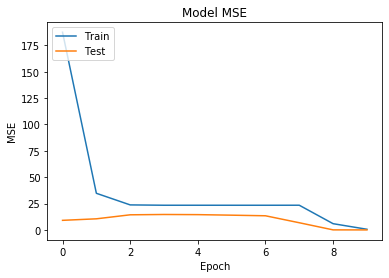

In [211]:
# Plot training & validation accuracy values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

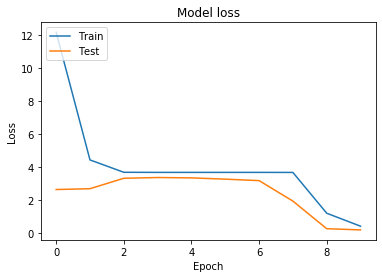

In [212]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

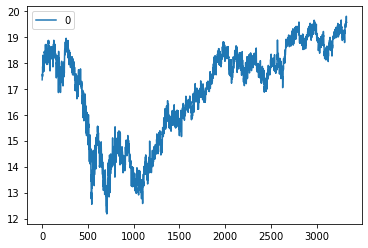

In [263]:
pd.DataFrame(y_test).plot()

# USE THIS IF USE GENERATORS
# convert genrators to 3D arrays that contain all data    
# ylist = []
# for i in range(len(test_generator)):
#     x, y = train_generator[i]
#     ylist.append(y)
# y_test = np.concatenate(ylist, axis=0)
# y_test = pd.DataFrame(y_test)
# y_test.plot()

           0
0  17.008785
1  17.090546
2  17.189796
3  17.264791
4  17.350607


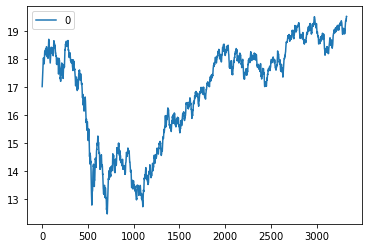

In [214]:
predictions = pd.DataFrame(model.predict(X_test))
print(predictions.head())
predictions.plot()

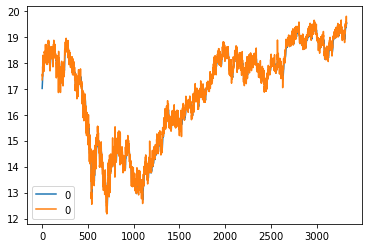

In [215]:
pred_plot = pd.concat([predictions, pd.DataFrame(y_test)], axis=1)
pred_plot.plot()

### Predict several steps ahead

In [318]:
predictions_step = []
# predictoins_times = np.arange(0, X_test.shape[0], 10)
# for i in predictoins_times:
for j in range(10):
    one_prediction = model.predict(X_test[j+20, np.newaxis, :])
    predictions_step.append(one_prediction)
predictions_step = np.concatenate(predictions_step)
display(predictions_step)

array([[17.854982],
       [17.855984],
       [17.821625],
       [17.915176],
       [17.97237 ],
       [18.085545],
       [18.171865],
       [18.24474 ],
       [18.271704],
       [18.26399 ]], dtype=float32)

In [319]:
true = pd.DataFrame(y_test).squeeze().iloc[:predictions_step.shape[0]].rename('True')
pred = pd.DataFrame(predictions_step)

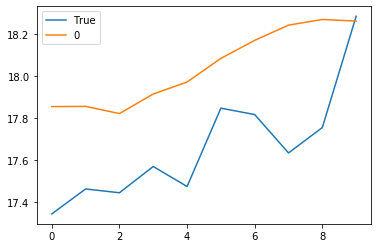

In [320]:
pd.concat([true, pd.DataFrame(pred)], axis=1).plot()

### MULTIVARIATE CASE - ALL FEATURES

In [321]:
X = spy_daily.drop(columns=['close_orig']).values
y = spy_daily.close.values.reshape(-1, 1)
train_val_index_split = 0.7
train_test_index_split = 0.85
train_generator = keras.preprocessing.sequence.TimeseriesGenerator(
    data=X,
    targets=y,
    length=30,
    sampling_rate=1,
    stride=1,
    start_index=0,
    end_index=int(train_val_index_split*X.shape[0]),
    shuffle=False,
    reverse=False,
    batch_size=128
)
validation_generator = keras.preprocessing.sequence.TimeseriesGenerator(
    data=X,
    targets=y,
    length=30,
    sampling_rate=1,
    stride=1,
    start_index=int((train_val_index_split*X.shape[0] + 1)),
    end_index=int(train_test_index_split*X.shape[0]),
    shuffle=False,
    reverse=False,
    batch_size=128
)
test_generator = keras.preprocessing.sequence.TimeseriesGenerator(
    data=X,
    targets=y,
    length=30,
    sampling_rate=1,
    stride=1,
    start_index=int(train_test_index_split*X.shape[0] + 1),
    end_index=None,
    shuffle=False,
    reverse=False,
    batch_size=128
)
# convert generator to inmemory 3D series (ifenough RAM)
def generator_to_obj(generator):
    xlist = []
    ylist = []
    for i in range(len(generator)):
        x, y = train_generator[i]
        xlist.append(x)
        ylist.append(y)
    X_train = np.concatenate(xlist, axis=0)
    y_train = np.concatenate(ylist, axis=0)
    return X_train, y_train
    
X_train, y_train = generator_to_obj(train_generator)
X_val, y_val = generator_to_obj(validation_generator)
X_test, y_test = generator_to_obj(test_generator)

In [322]:
# model
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, X.shape[1]]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])
model.compile(loss='mae', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=15, validation_data=[X_val, y_val], verbose=1)
# history = model.fit_generator(train_generator, epochs=40, validation_data=validation_generator, verbose=1)

Train on 15142 samples, validate on 3328 samples
Epoch 1/15
15142/15142 [==============================] - 45s 3ms/sample - loss: 10.3714 - mean_squared_error: 152.4102 - val_loss: 1.5925 - val_mean_squared_error: 3.4002
Epoch 2/15
15142/15142 [==============================] - 43s 3ms/sample - loss: 3.4734 - mean_squared_error: 24.0651 - val_loss: 2.4981 - val_mean_squared_error: 8.9980
Epoch 3/15
15142/15142 [==============================] - 43s 3ms/sample - loss: 2.7971 - mean_squared_error: 15.9700 - val_loss: 2.8554 - val_mean_squared_error: 11.9549
Epoch 4/15
15142/15142 [==============================] - 43s 3ms/sample - loss: 2.7554 - mean_squared_error: 14.9950 - val_loss: 3.1257 - val_mean_squared_error: 14.4037
Epoch 5/15
15142/15142 [==============================] - 44s 3ms/sample - loss: 2.7400 - mean_squared_error: 14.6902 - val_loss: 3.1721 - val_mean_squared_error: 14.9057
Epoch 6/15
15142/15142 [==============================] - 43s 3ms/sample - loss: 2.7297 - mean_s

In [323]:
historydf = pd.DataFrame(history.history)
display(historydf.head())

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,10.371376,152.410187,1.592477,3.400202
1,3.473366,24.065084,2.498144,8.997984
2,2.797144,15.969975,2.855429,11.954856
3,2.755405,14.994985,3.125747,14.403748
4,2.740037,14.690196,3.172083,14.905731


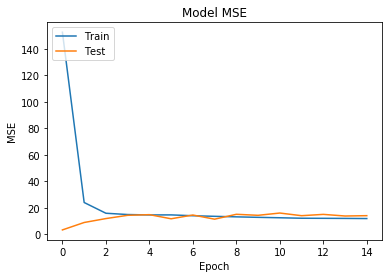

In [324]:
# Plot training & validation accuracy values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

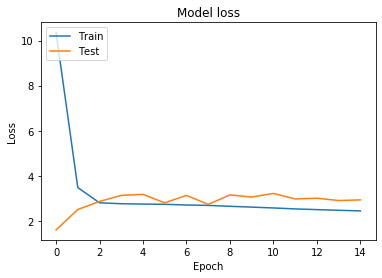

In [325]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

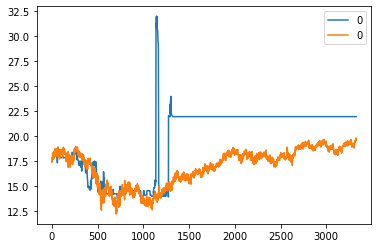

In [326]:
predictions = pd.DataFrame(model.predict(X_test))
pred_plot = pd.concat([predictions, pd.DataFrame(y_test)], axis=1)
pred_plot.plot()

### Change loss

In [331]:
# model
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, X.shape[1]]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=10, validation_data=[X_val, y_val], verbose=1)
# history = model.fit_generator(train_generator, epochs=40, validation_data=validation_generator, verbose=1)

Train on 15142 samples, validate on 3328 samples
Epoch 1/10
15142/15142 [==============================] - 49s 3ms/sample - loss: 10.2950 - mean_absolute_error: 10.2950 - val_loss: 1.6568 - val_mean_absolute_error: 1.6568
Epoch 2/10
15142/15142 [==============================] - 48s 3ms/sample - loss: 3.6746 - mean_absolute_error: 3.6746 - val_loss: 2.1306 - val_mean_absolute_error: 2.1306
Epoch 3/10
15142/15142 [==============================] - 46s 3ms/sample - loss: 3.0772 - mean_absolute_error: 3.0772 - val_loss: 2.6505 - val_mean_absolute_error: 2.6505
Epoch 4/10
15142/15142 [==============================] - 44s 3ms/sample - loss: 3.0465 - mean_absolute_error: 3.0465 - val_loss: 2.4492 - val_mean_absolute_error: 2.4492
Epoch 5/10
15142/15142 [==============================] - 44s 3ms/sample - loss: 3.0534 - mean_absolute_error: 3.0534 - val_loss: 2.4607 - val_mean_absolute_error: 2.4607
Epoch 6/10
15142/15142 [==============================] - 44s 3ms/sample - loss: 3.0367 - mean

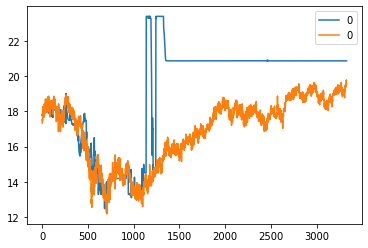

In [332]:
predictions = pd.DataFrame(model.predict(X_test))
pred_plot = pd.concat([predictions, pd.DataFrame(y_test)], axis=1)
pred_plot.plot()

### FF NN

In [334]:
# model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(30, X.shape[1])),
    keras.layers.Dense(20),
    keras.layers.Dense(20),
    keras.layers.Dense(1)
])
model.compile(loss='mae', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=15, validation_data=[X_val, y_val], verbose=1)
# history = model.fit_generator(train_generator, epochs=40, validation_data=validation_generator, verbose=1)

Train on 15142 samples, validate on 3328 samples
Epoch 1/15
15142/15142 [==============================] - 5s 303us/sample - loss: 1261065.9577 - mean_squared_error: 8668394291200.0000 - val_loss: 71666.5760 - val_mean_squared_error: 7719603712.0000
Epoch 2/15
15142/15142 [==============================] - 3s 187us/sample - loss: 194445.0408 - mean_squared_error: 110016692224.0000 - val_loss: 47500.4341 - val_mean_squared_error: 3183864832.0000
Epoch 3/15
15142/15142 [==============================] - 3s 189us/sample - loss: 42282.1963 - mean_squared_error: 8178981376.0000 - val_loss: 7091.6492 - val_mean_squared_error: 71427432.0000
Epoch 4/15
15142/15142 [==============================] - 3s 185us/sample - loss: 8054.2550 - mean_squared_error: 211477056.0000 - val_loss: 739.5880 - val_mean_squared_error: 761386.8750
Epoch 5/15
15142/15142 [==============================] - 3s 186us/sample - loss: 9014.2111 - mean_squared_error: 288517440.0000 - val_loss: 2447.6432 - val_mean_squared_

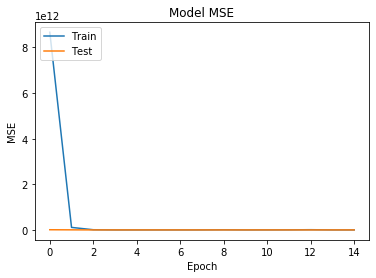

In [335]:
# Plot training & validation accuracy values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

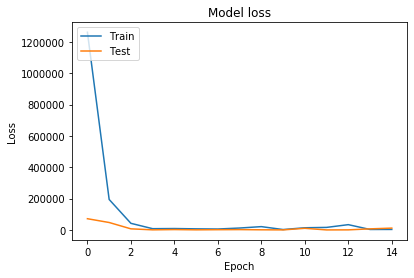

In [336]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

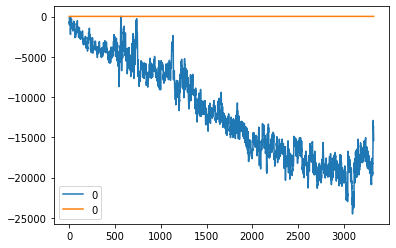

In [338]:
predictions = pd.DataFrame(model.predict(X_test))
pred_plot = pd.concat([predictions, pd.DataFrame(y_test)], axis=1)
pred_plot.plot()